In [ ]:
# Jeans mass for polytropic gas
# Reference: Equation 10.1

import sympy as sp
from sympy import symbols, Eq, solve, lambdify, sqrt, exp, log, pi
import astropy.units as u
import astropy.constants as const

# Define symbols
G_sym, M_J_sym, n_sym, m_sym, T_sym, k_B_sym, pi_sym = symbols('G M_J n m T k_B pi')

# Construct the equation
rhs = (9/4) * sqrt(1/(2*pi_sym*n_sym)) * 1/m_sym**2 * (k_B_sym*T_sym/G_sym)**sp.Rational(3,2)
eq10_1 = Eq(M_J_sym, rhs)

# Assign values
G_val   = const.G
k_B_val = const.k_B
pi_val  = u.dimensionless_unscaled

n_val = 1.0 * u.m**-3
m_val = 1.0 * u.kg
T_val = 1.0 * u.K

# Solve for the Jeans mass
M_J_solution = solve(eq10_1, M_J_sym)[0]

# Lambdify the solution (substitute constants with numeric values)
M_J_numeric = M_J_solution.subs({G_sym: G_val.value,
                                 k_B_sym: k_B_val.value,
                                 pi_sym: pi_val.value})
M_J_func = lambdify([n_sym, m_sym, T_sym], M_J_numeric, modules='numpy')

# Compute the Jeans mass with the assigned values
jeans_mass = M_J_func(n_val.value, m_val.value, T_val.value) * u.kg

print(f"Jeans mass: {jeans_mass}")

AttributeError: 'CompositeUnit' object has no attribute 'value'

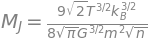

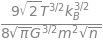

'Jeans mass'

<Quantity 9.57582014e+32 kg>

In [9]:
# Jeans mass for polytropic gas (Equation 10.1)

from sympy import symbols, Eq, solve, lambdify, sqrt, exp, log, pi, init_printing, Rational
from astropy import units as u, constants as const
from IPython.display import display

init_printing()

# Define symbols
G, M_J, T, k_B, m, n = symbols('G M_J T k_B m n', real=True, positive=True)

# Construct the equation
rhs = (Rational(9,4)) * sqrt(Rational(1)/(Rational(2)*pi*n)) * Rational(1)/(m**Rational(2)) * ((k_B*T)/G)**(Rational(3,2))
eq10_1 = Eq(M_J, rhs)

# Display the equation
display(eq10_1)

# Solve for M_J and display the solution
sol = solve(eq10_1, M_J)[0]
display(sol)

# Lambdify the RHS (all RHS variables as arguments)
eq10_1_lambidified = lambdify((G, T, k_B, m, n), rhs, modules='numpy')

# Assign sample values with astropy units
G_val   = const.G          # gravitational constant
T_val   = 10.0 * u.K       # temperature
k_B_val = const.k_B        # Boltzmann constant
m_val   = 1.67e-27 * u.kg  # mean particle mass (proton mass)
n_val   = 1e6 * u.m**-3    # particle number density

# Compute the Jeans mass
M_J_val = eq10_1_lambidified(G_val, T_val, k_B_val, m_val, n_val)

# Print the result
display("Jeans mass")
display(M_J_val.to('kg'))